In [18]:
import re

In [19]:
file_list = [
    "sherlock_holmes.txt",
    "moby_dick.txt",
    "pride_and_prejudice.txt",
    "alice_in_wonderland.txt"
]

combined_text = ""

for filename in file_list:
    with open(f"../data/{filename}", 'r', encoding='utf-8') as file:
        content = file.read()
        combined_text += content + " "
print("Length of text:", len(combined_text))

Length of text: 2653069


In [20]:
combined_text = combined_text.lower()

In [21]:
# Removing punctuation (keeping apostrophes)
combined_text = re.sub(r"[^a-z0-9'\s]", '', combined_text)

# Replacing multiple spaces with a single space
combined_text = re.sub(r'\s+', ' ', combined_text).strip()

print(combined_text[:500])

the adventures of sherlock holmes by arthur conan doyle contents i a scandal in bohemia ii the redheaded league iii a case of identity iv the boscombe valley mystery v the five orange pips vi the man with the twisted lip vii the adventure of the blue carbuncle viii the adventure of the speckled band ix the adventure of the engineers thumb x the adventure of the noble bachelor xi the adventure of the beryl coronet xii the adventure of the copper beeches i a scandal in bohemia i to sherlock holmes


In [22]:
# Tokenizing
all_tokens = combined_text.split()

print("Total tokens after combining:", len(all_tokens))
print("First 50 tokens:", all_tokens[:50])

Total tokens after combining: 470913
First 50 tokens: ['the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'contents', 'i', 'a', 'scandal', 'in', 'bohemia', 'ii', 'the', 'redheaded', 'league', 'iii', 'a', 'case', 'of', 'identity', 'iv', 'the', 'boscombe', 'valley', 'mystery', 'v', 'the', 'five', 'orange', 'pips', 'vi', 'the', 'man', 'with', 'the', 'twisted', 'lip', 'vii', 'the', 'adventure', 'of', 'the', 'blue', 'carbuncle', 'viii', 'the']


In [23]:
import json

with open('../data/combined_tokens.json', 'w', encoding='utf-8') as outfile:
    json.dump(all_tokens, outfile)

In [24]:
from collections import defaultdict, Counter

def generate_bigrams(tokens):
    bigrams = []

    for i in range(len(tokens) - 1):
        bigrams.append((tokens[i], tokens[i+1]))
    return bigrams

In [26]:
bigrams = generate_bigrams(all_tokens)
print("First 10 bigrams:", bigrams[:10])

First 10 bigrams: [('the', 'adventures'), ('adventures', 'of'), ('of', 'sherlock'), ('sherlock', 'holmes'), ('holmes', 'by'), ('by', 'arthur'), ('arthur', 'conan'), ('conan', 'doyle'), ('doyle', 'contents'), ('contents', 'i')]


In [29]:
def build_bigram_model(all_tokens):
    model = defaultdict(Counter)
    bigram_list = generate_bigrams(all_tokens)
    for w1, w2 in bigram_list:
        model[w1][w2] += 1
    return model

In [30]:
def predict_next_word_bigram(model, word):
    if word not in model:
        return None
    return model[word].most_common(1)[0][0]

In [31]:
def generate_trigrams(all_tokens):
    trigrams = []
    for i in range(len(all_tokens) - 2):
        trigrams.append((all_tokens[i], all_tokens[i+1], all_tokens[i+2]))
    return trigrams

In [32]:
def build_trigram_model(all_tokens):
    model = defaultdict(Counter)
    trigram_list = generate_trigrams(all_tokens)
    for w1, w2, w3 in trigram_list:
        model[(w1, w2)][w3] += 1
    return model

In [33]:
def predict_next_word_trigram(model, word1, word2):
    if (word1, word2) not in model:
        return None
    return model[(word1, word2)].most_common(1)[0][0]

In [34]:
# Building bigram and trigram models
bigram_model = build_bigram_model(all_tokens)
trigram_model = build_trigram_model(all_tokens)

In [35]:
# Next word prediction for bigram
test_word_bigram = "sherlock"
predicted_bigram = predict_next_word_bigram(bigram_model, test_word_bigram)
print(f"Bigram prediction for '{test_word_bigram}': {predicted_bigram}")

Bigram prediction for 'sherlock': holmes


In [36]:
# Next word prediction for trigram
test_words_trigram = ("sherlock", "holmes")
predicted_trigram = predict_next_word_trigram(trigram_model, test_words_trigram[0], test_words_trigram[1])
print(f"Trigram prediction for '{test_words_trigram}': {predicted_trigram}")

Trigram prediction for '('sherlock', 'holmes')': was


In [37]:
def generate_sentence_bigram(model, start_word, length=10):
    sentence = [start_word]
    current_word = start_word
    
    for _ in range(length - 1):
        next_word = predict_next_word_bigram(model, current_word)
        if not next_word:
            break
        sentence.append(next_word)
        current_word = next_word
    
    return ' '.join(sentence)

# Example
generated_bigram_sentence = generate_sentence_bigram(bigram_model, 'sherlock', 10)
print("Bigram generated sentence:", generated_bigram_sentence)

Bigram generated sentence: sherlock holmes i have been a little of the whale


In [38]:
def generate_sentence_trigram(model, start_word1, start_word2, length=10):
    sentence = [start_word1, start_word2]
    w1, w2 = start_word1, start_word2
    
    for _ in range(length - 2):
        next_word = predict_next_word_trigram(model, w1, w2)
        if not next_word:
            break
        sentence.append(next_word)
        w1, w2 = w2, next_word
    
    return ' '.join(sentence)

# Example
generated_trigram_sentence = generate_sentence_trigram(trigram_model, 'sherlock', 'holmes', 10)
print("Trigram generated sentence:", generated_trigram_sentence)

Trigram generated sentence: sherlock holmes was not a word of command he was


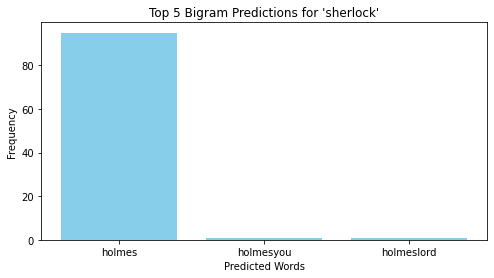

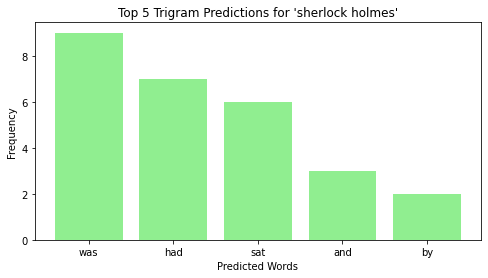

In [39]:
import matplotlib.pyplot as plt

def plot_bigram_distribution(model, word, top_n=5):
    """
    Plot the frequency distribution of the top 'top_n' predicted next words for a given single word (bigram).
    """
    if word not in model:
        print(f"No predictions for '{word}' found in the bigram model.")
        return
    
    most_common = model[word].most_common(top_n)
    words, counts = zip(*most_common)
    
    plt.figure(figsize=(8, 4))
    plt.bar(words, counts, color='skyblue')
    plt.title(f"Top {top_n} Bigram Predictions for '{word}'")
    plt.xlabel("Predicted Words")
    plt.ylabel("Frequency")
    plt.show()

def plot_trigram_distribution(model, word1, word2, top_n=5):
    """
    Plot the frequency distribution of the top 'top_n' predicted next words for a given word pair (trigram).
    """
    if (word1, word2) not in model:
        print(f"No predictions for '{word1} {word2}' found in the trigram model.")
        return
    
    most_common = model[(word1, word2)].most_common(top_n)
    words, counts = zip(*most_common)
    
    plt.figure(figsize=(8, 4))
    plt.bar(words, counts, color='lightgreen')
    plt.title(f"Top {top_n} Trigram Predictions for '{word1} {word2}'")
    plt.xlabel("Predicted Words")
    plt.ylabel("Frequency")
    plt.show()

# Visualizing
plot_bigram_distribution(bigram_model, "sherlock", top_n=5)
plot_trigram_distribution(trigram_model, "sherlock", "holmes", top_n=5)

In [40]:
# Interactive bigram next word prediction

user_word = input("Enter a word for bigram prediction: ").strip().lower()

predicted_bigram = predict_next_word_bigram(bigram_model, user_word)

if predicted_bigram:
    print(f"Bigram prediction for '{user_word}': {predicted_bigram}")
else:
    print(f"No prediction available for '{user_word}' in the bigram model.")

Enter a word for bigram prediction: dr
Bigram prediction for 'dr': grimesby


In [41]:
# Interactive trigram next word prediction

input_text = input("Enter two words (separated by a space) for trigram prediction: ").strip().lower()

words = input_text.split()

if len(words) < 2:
    print("Please enter at least two words.")
else:
    predicted_trigram = predict_next_word_trigram(trigram_model, words[0], words[1])
    
    if predicted_trigram:
        print(f"Trigram prediction for '{words[0]} {words[1]}': {predicted_trigram}")
    else:
        print(f"No prediction available for '{words[0]} {words[1]}' in the trigram model.")

Enter two words (separated by a space) for trigram prediction: oh my
Trigram prediction for 'oh my': dear


In [42]:
def evaluate_bigram_accuracy(model, test_tokens):
    correct = 0
    total = 0
    
    for i in range(len(test_tokens) - 1):
        current_word = test_tokens[i]
        actual_next = test_tokens[i + 1]
        predicted_next = predict_next_word_bigram(model, current_word)
        if predicted_next is not None:
            total += 1
            if predicted_next == actual_next:
                correct += 1
    
    return correct / total if total > 0 else 0.0

In [43]:
def evaluate_trigram_accuracy(model, test_tokens):
    correct = 0
    total = 0
    
    for i in range(len(test_tokens) - 2):
        w1, w2 = test_tokens[i], test_tokens[i+1]
        actual_next = test_tokens[i+2]
        predicted_next = predict_next_word_trigram(model, w1, w2)
        if predicted_next is not None:
            total += 1
            if predicted_next == actual_next:
                correct += 1
    
    return correct / total if total > 0 else 0.0

In [44]:
# Splitting tokens into training (80%) and test (20%)
split_index = int(0.8 * len(all_tokens))
train_tokens = all_tokens[:split_index]
test_tokens = all_tokens[split_index:]

In [45]:
# Building models on training data
bigram_model_train = build_bigram_model(train_tokens)
trigram_model_train = build_trigram_model(train_tokens)

# Evaluating on test data
bigram_acc = evaluate_bigram_accuracy(bigram_model_train, test_tokens)
trigram_acc = evaluate_trigram_accuracy(trigram_model_train, test_tokens)

print("Bigram Accuracy on combined test set:", bigram_acc)
print("Trigram Accuracy on combined test set:", trigram_acc)

Bigram Accuracy on combined test set: 0.10879401074160473
Trigram Accuracy on combined test set: 0.11338467413441955


In [46]:
# Defining the Add-One (Laplace) smoothing functions for the bigram model

from collections import defaultdict, Counter

def build_bigram_model_addone(tokens):
    model = defaultdict(Counter)
    vocab = set(tokens)
    
    for i in range(len(tokens) - 1):
        word1 = tokens[i]
        word2 = tokens[i + 1]
        model[word1][word2] += 1
    
    for word1 in model:
        for v in vocab:
            model[word1][v] += 1
    
    return model, vocab

def predict_next_word_bigram_addone(model, vocab, word):
    if word not in model:
        return None
    
    # The total count for this word is the sum of counts of all possible next words.
    total_count = sum(model[word][w] for w in vocab)
    
    best_word = None
    best_prob = 0.0
    
    # Calculate probability for each candidate next word in vocab.
    for candidate_next in vocab:
        # Probability = count(word -> candidate_next) / total_count
        prob = model[word][candidate_next] / total_count
        if prob > best_prob:
            best_prob = prob
            best_word = candidate_next
    
    return best_word

In [47]:
# Building and evaluating the Add-One bigram model

addone_bigram_model, addone_vocab = build_bigram_model_addone(train_tokens)

def evaluate_bigram_accuracy_addone(model, vocab, test_tokens):
    correct = 0
    total = 0
    
    for i in range(len(test_tokens) - 1):
        current_word = test_tokens[i]
        actual_next = test_tokens[i + 1]
        
        # Use our new Add-One prediction function
        predicted_next = predict_next_word_bigram_addone(model, vocab, current_word)
        
        # If the model can't predict anything, skip it (or treat it as incorrect).
        if predicted_next is not None:
            total += 1
            if predicted_next == actual_next:
                correct += 1
    
    if total == 0:
        return 0.0
    return correct / total

# Evaluating on test data
addone_bigram_acc = evaluate_bigram_accuracy_addone(addone_bigram_model, addone_vocab, test_tokens)
print("Add-One Bigram Accuracy on combined test set:", addone_bigram_acc)

# Comparing to the original bigram model's accuracy
print("Original Bigram Accuracy on combined test set:", bigram_acc)

Add-One Bigram Accuracy on combined test set: 0.1097162697336299
Original Bigram Accuracy on combined test set: 0.10879401074160473
